In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load the datasets
dataset_olympics=pd.read_csv('C:/olympic/dataset_olympics.csv')
noc_region=pd.read_csv('C:/olympic/noc_region.csv')

In [3]:
#print the dataset1
dataset_olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
#print the dataset2
noc_region.head()

,noc_region,reg,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
#rename the columns name
noc_region.rename(columns={'noc_region':'NOC','reg':'Region','notes':'Notes'},inplace=True)

In [6]:
#check the updated column name
noc_region.head()

,NOC,Region,Notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
#join the dataframes
olympic_df=dataset_olympics.merge(noc_region,how='left',on='NOC')
olympic_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [8]:
#check null values
null_values=olympic_df.isna()
null_columns=null_values.any()
null_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [9]:
#count the number of null value in each columns
olympic_df.isnull().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
Region       63
Notes     68756
dtype: int64

In [10]:
#count the number of rows and columns in a dataframe
olympic_df.shape

(70000, 17)

In [11]:
#check the duplicated data is present or not and print the value of duplicated and non-duplicated data
olympic_df.duplicated().value_counts()

False    69617
True       383
dtype: int64

In [12]:
#display the rows that contains duplicated values
duplicates=olympic_df[olympic_df.duplicated()]
duplicates.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,Belgium,NaN
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN,USA,NaN
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN,USA,NaN
4862,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN,Germany,NaN
4864,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN,Germany,NaN


In [13]:
#drop the duplicated values
olympic_df.drop_duplicates(keep='first',inplace=True)

In [17]:
#check the duplicated data is dropped
olympic_df.duplicated().value_counts()

False    69617
dtype: int64

In [18]:
#what is the rate between Male to Female that participate at the olympic?
gender=olympic_df.Sex.value_counts()
gender

M    51531
F    18086
Name: Sex, dtype: int64

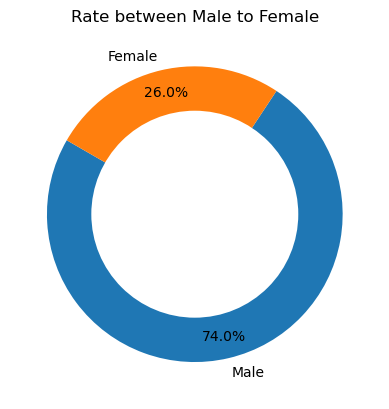

In [19]:
#plot the donut chart to display the number of male and female participants in olympic
plt.title('Rate between Male to Female')
Gender=['Male','Female']
plt.pie(gender,labels=Gender,autopct='%1.1f%%',pctdistance=0.85,startangle=150,shadow=False)
center_circle=plt.Circle((0,0),0.70,fc='white')
fig=plt.gcf()
fig.gca().add_artist(center_circle)
plt.show()

In [20]:
#what is the number of participants per year?
number_of_participants=olympic_df.Year.value_counts().head(10)
number_of_participants

1992    4176
1988    3873
2016    3675
2000    3525
1996    3487
2008    3483
2004    3429
2012    3377
1984    3135
1972    3058
Name: Year, dtype: int64

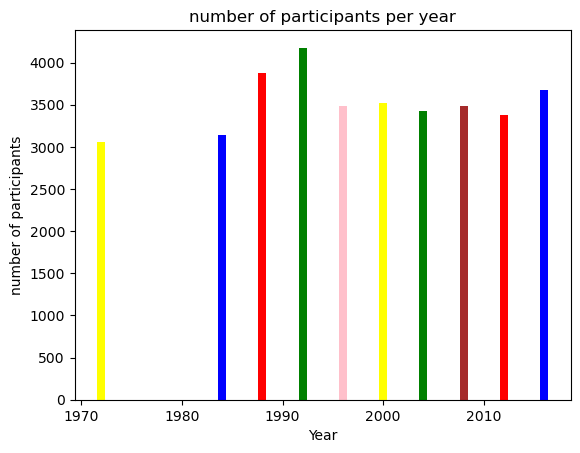

In [33]:
#plot the bar chart for number of participants per year
colors=['green','red','blue','yellow','pink','brown']
plt.bar(number_of_participants.index,number_of_participants,color=colors)
plt.title('number of participants per year')
plt.xlabel('Year')
plt.ylabel('number of participants')
plt.show()

In [45]:
#what is the most year participants win gold medal?
max_year=olympic_df.Year.max()
print('most year participants win gold medals is:',max_year)
number_of_gold=olympic_df[(olympic_df.Year==max_year)&(olympic_df.Medal=='Gold')].Medal
number_of_gold.value_counts().head()

most year participants win gold medals is: 2016


Gold    174
Name: Medal, dtype: int64

In [44]:
#what is higher sport that Sporter play it?
sporter_play=olympic_df.Sport.value_counts()
sporter_play.head(1)
print('higher sport that Sporter play it:',sporter_play.head(1))

higher sport that Sporter play it: Athletics    10629
Name: Sport, dtype: int64
